# Chapter 6: Distributions

# Exercises

In [14]:
import pandas as pd
import numpy as np


1. Consider the Transactions.csv file. Determine if the variables pens and pencils are independent. Find a pair of variables that are dependent. 

In [15]:
#Transactions.csv moved into the folder for consistency in file input. Edit the file path as needed.
transactions = pd.read_csv("Transactions.csv")
transactions.head(5)

,Transaction,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
0,1000004,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1000007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,100001,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1000010,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1000016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
transactions['Pencils'].value_counts(normalize=True) 

0    0.865864
1    0.134136
Name: Pencils, dtype: float64

In [17]:
transactions['Pens'].value_counts(normalize=True) 

0    0.847622
1    0.152378
Name: Pens, dtype: float64

In [18]:
pd.crosstab(transactions['Pencils'], transactions['Pens'], normalize='all') 

Pens,0,1
Pencils,,
0,0.722222,0.143641
1,0.125400,0.008736


In [19]:
Lift = 0.008736/(0.134136*0.152378)
print(Lift)

0.42741032079584573


In [20]:
#The Lift Value is 0.4274, which is very insignificant, therefore the two variables are linearly nondependent.

Finding a pair of dependent variables
Refer to textbook - Perfume and toothbrush

2. Create a sample of size 1000 from a bivariate normal distribution where the two variables each have a mean of 15 and the correlation between the two is 0.6. Create a 3-d plot to visualize the data. 

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [26]:
# test how the numbers would be formed.
correl_matrix = [[1, 0.6],[0.6,1]]
#covariance is the product of the 2 standard deviations with the standard deviations.


#add any pair that averages to 15

x = np.random.multivariate_normal([13,17],correl_matrix , 10) 
print(x)

[[11.99070416 18.26041292]
 [14.33858382 17.85562627]
 [14.17117685 17.33405259]
 [13.40516148 16.53422206]
 [12.35385299 16.55597245]
 [12.64074613 17.06659368]
 [12.6146225  17.33264936]
 [11.31693852 15.79142216]
 [12.77228242 17.15192293]
 [14.11885418 17.76213571]]


In [27]:
x

array([[11.99070416, 18.26041292],
       [14.33858382, 17.85562627],
       [14.17117685, 17.33405259],
       [13.40516148, 16.53422206],
       [12.35385299, 16.55597245],
       [12.64074613, 17.06659368],
       [12.6146225 , 17.33264936],
       [11.31693852, 15.79142216],
       [12.77228242, 17.15192293],
       [14.11885418, 17.76213571]])

In [28]:
np.corrcoef(x[:,0], x[:,1])[0,1]  

0.4706954013683479

C:\Users\jwyan\AppData\Local\Temp/ipykernel_4508/206386026.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


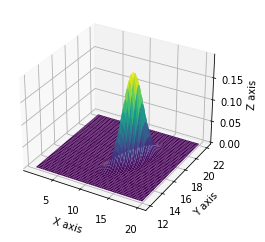

In [36]:

x = np.linspace(1, 20, 500) 
y = np.linspace(12, 22,500) 
X, Y = np.meshgrid(x,y) 
pos = np.empty(X.shape + (2,)) 
pos[:, :, 0] = X; pos[:, :, 1] = Y 
rv = multivariate_normal([13,17],correl_matrix ) 

 

#Make a 3D plot 

fig = plt.figure() 

ax = fig.gca(projection='3d') 

ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0) 

ax.set_xlabel('X axis') 

ax.set_ylabel('Y axis') 

ax.set_zlabel('Z axis') 

plt.show() 

3. Create a sample of size 1000 from a bivariate normal distribution where the two variables each have a mean of 10 and the correlation between the two is –0.5. Transform the second variable by squaring it and create a 3-d plot to visualize the resulting distribution

In [37]:
# test how the numbers would be formed.
correl_matrix = [[1, -0.5],[-0.5,1]]
#covariance is the product of the 2 standard deviations with the standard deviations.


#add any pair that averages to 15

x = np.random.multivariate_normal([4,16],correl_matrix , 10) 
print(x)

[[ 3.56792106 16.50347534]
 [ 4.09171918 14.41738883]
 [ 3.55473363 15.40734306]
 [ 3.64631502 16.2192849 ]
 [ 5.34221029 13.94728372]
 [ 4.77486287 15.75611042]
 [ 2.66404623 15.93369801]
 [ 3.42855811 15.45838583]
 [ 4.83009172 12.67347381]
 [ 2.70309607 16.9933536 ]]


In [39]:
transform = np.matmul(correl_matrix,correl_matrix)
print(transform)

[[ 1.25 -1.  ]
 [-1.    1.25]]


C:\Users\jwyan\AppData\Local\Temp/ipykernel_4508/1352471020.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


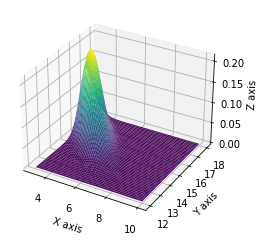

In [42]:
x = np.linspace(3,10, 500) 
y = np.linspace(12, 18,500) 
X, Y = np.meshgrid(x,y) 
pos = np.empty(X.shape + (2,)) 
pos[:, :, 0] = X; pos[:, :, 1] = Y 
rv = multivariate_normal([4,16],transform) 

 

#Make a 3D plot 

fig = plt.figure() 

ax = fig.gca(projection='3d') 

ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0) 

ax.set_xlabel('X axis') 

ax.set_ylabel('Y axis') 

ax.set_zlabel('Z axis') 

plt.show() 

4. Simulate 500 samples from standard uniform distributions, with each sample containing 200 data points. Similarly, simulate 500 samples from standard lognormal distributions, with each sample containing 200 data points. Plot the empirical distribution of the sum of all these 1000 samples. Does it appear approximately normal?

C:\Users\jwyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


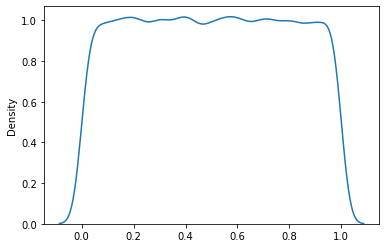

In [50]:
import seaborn as sns
from numpy import random 

uniform = random.uniform(size=(500, 200))

sns.distplot(uniform, hist=False)

plt.show()

C:\Users\jwyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


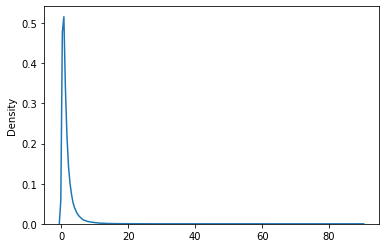

In [52]:
lognormal = random.lognormal(size=(500, 200))
sns.distplot(lognormal, hist=False)

plt.show()

C:\Users\jwyan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


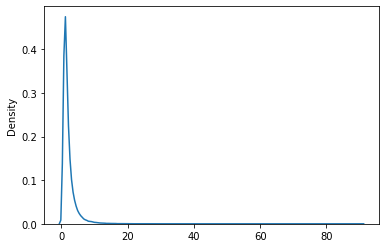

In [53]:
sample = uniform + lognormal
sns.distplot(sample, hist=False)

plt.show()

In [54]:
print(lognormal)

[[0.05549067 1.09943015 3.42947892 ... 2.62945634 0.33498578 0.26395838]
 [0.21671558 1.31891055 3.973091   ... 0.8342253  2.26111738 0.71469557]
 [0.31267766 1.57514084 0.61993112 ... 0.67668314 1.31427279 0.27977313]
 ...
 [0.83892502 1.47616126 0.89838986 ... 5.44098821 1.69898197 0.62578794]
 [1.22679651 3.76661922 0.15935789 ... 0.63359305 0.19401754 2.04661211]
 [0.17602312 1.41060946 2.98987016 ... 1.15048522 6.82315532 3.02037408]]


In [55]:
print(sample)

[[0.0910558  1.37244812 4.3936557  ... 3.15207101 1.01033214 1.20795257]
 [0.9591079  1.91491179 4.29128492 ... 1.53571103 3.02402467 0.76545693]
 [1.24040167 2.28909511 0.7954283  ... 1.24751793 1.82175569 1.01036093]
 ...
 [1.43830619 1.68685575 1.40509997 ... 6.12831514 2.21065872 0.72817928]
 [1.56018923 4.40894347 0.28419106 ... 1.55706514 0.3893636  2.24321701]
 [0.78745222 2.04026873 3.57857401 ... 2.11233642 7.26505594 3.95048035]]


Consider the following population distribution. Create sampling distributions of size 100 for the following statistics: mean, median, variance, minimum, and maximum. Which sampling distributions exhibit normality? 